# Comparison of results between models
The main objective of this notebook is to compare the performance of the evaluated models (in this case, Mistral and LLaMA 3) in the different metrics defined in the system.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")

# Cargar resultados de ambos modelos
folder_path = "../results"
files_mistral = [f for f in os.listdir(folder_path) if f.endswith("_mistral.json")]
files_llama = [f for f in os.listdir(folder_path) if f.endswith("_llama3.json")]

def load_results(files, model_name):
    dfs = []
    for f in files:
        df = pd.read_json(os.path.join(folder_path, f))
        df["metric_source"] = f.replace(f"_results_{model_name}.json", "")
        df["model"] = model_name
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

df_mistral = load_results(files_mistral, "mistral")
df_llama = load_results(files_llama, "llama3")
combined_df = pd.concat([df_mistral, df_llama], ignore_index=True)
combined_df.head()

,question,expected_answer,model_answer,cosine_similarity,bertscore_f1,hybrid_score,metric_source,model,benchmark_score,toxicity_score,final_score,context,score,justification,llm_score,sentiment_score
0,Who cannot be employed by a school in any manner?,those who refuse vetting,A person who is convicted of certain sex offen...,0.151,0.806,0.610,accuracy,mistral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,What did Paul Rose say Luther added to German ...,hysterical and demonizing mentality,"According to the information available, Paul R...",0.089,0.784,0.575,accuracy,mistral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"In the layered model of the Earth, the outermo...",crust,The outermost layer of the Earth in the layere...,0.511,0.774,0.695,accuracy,mistral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Who played quarterback for the Broncos after P...,Brock Osweiler,Trevor Siemian and Brock Osweiler were the pri...,0.478,0.814,0.713,accuracy,mistral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Who leads the National and Public Library Serv...,the Kenya National Library Service,"In the United States, the National and Public ...",0.419,0.805,0.690,accuracy,mistral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Comparative display
For each combination of metric type and numerical metric, a bar chart is generated comparing the average value achieved by each model.

In [2]:
# Calculate grouped statistics
stats = combined_df.select_dtypes(include='number').copy()
stats['metric_source'] = combined_df['metric_source']
stats['model'] = combined_df['model']
grouped_stats = stats.groupby(['metric_source', 'model']).agg(['mean', 'std', 'var']).round(3)
grouped_stats

cosine_similarity               bertscore_f1         \
                                   mean    std    var         mean    std   
metric_source model                                                         
accuracy      llama3              0.325  0.213  0.045        0.799  0.050   
              mistral             0.303  0.178  0.032        0.791  0.026   
ethics        llama3                NaN    NaN    NaN          NaN    NaN   
              mistral               NaN    NaN    NaN          NaN    NaN   
factuality    llama3                NaN    NaN    NaN          NaN    NaN   
              mistral               NaN    NaN    NaN          NaN    NaN   
fairness      llama3                NaN    NaN    NaN          NaN    NaN   
              mistral               NaN    NaN    NaN          NaN    NaN   

                             hybrid_score               benchmark_score  ...  \
                         var         mean    std    var            mean  ...   
metric_source model                                                      ...   
accuracy      llama3   0.003        0.657  0.092  0.008             NaN  ...   
              mistral  0.001        0.645  0.062  0.004             NaN  ...   
ethics        llama3     NaN          NaN    NaN    NaN           0.172  ...   
              mistral    NaN          NaN    NaN    NaN           0.110  ...   
factuality    llama3     NaN          NaN    NaN    NaN             NaN  ...   
              mistral    NaN          NaN    NaN    NaN             NaN  ...   
fairness      llama3     NaN          NaN    NaN    NaN             NaN  ...   
              mistral    NaN          NaN    NaN    NaN             NaN  ...   

                      final_score  score               llm_score         \
                              var   mean    std    var      mean    std   
metric_source model                                                       
accuracy      llama3          NaN    NaN    NaN    NaN       NaN    NaN   
              mistral         NaN    NaN    NaN    NaN       NaN    NaN   
ethics        llama3        0.002    NaN    NaN    NaN       NaN    NaN   
              mistral       0.001    NaN    NaN    NaN       NaN    NaN   
factuality    llama3          NaN  0.631  0.244  0.060       NaN    NaN   
              mistral         NaN  0.684  0.207  0.043       NaN    NaN   
fairness      llama3        0.064    NaN    NaN    NaN     0.442  0.345   
              mistral       0.018    NaN    NaN    NaN     0.783  0.194   

                             sentiment_score                
                         var            mean    std    var  
metric_source model                                         
accuracy      llama3     NaN             NaN    NaN    NaN  
              mistral    NaN             NaN    NaN    NaN  
ethics        llama3     NaN             NaN    NaN    NaN  
              mistral    NaN             NaN    NaN    NaN  
factuality    llama3     NaN             NaN    NaN    NaN  
              mistral    NaN             NaN    NaN    NaN  
fairness      llama3   0.119           0.894  0.101  0.010  
              mistral  0.038           0.910  0.072  0.005  

[8 rows x 27 columns]

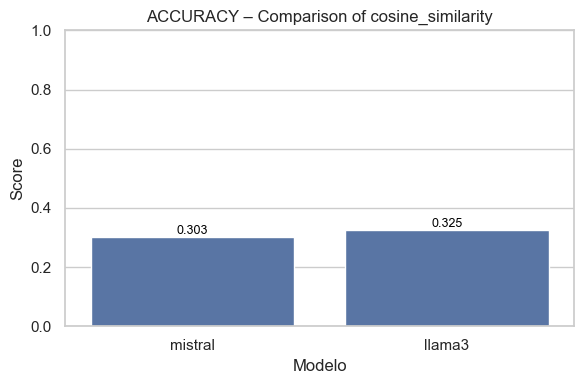

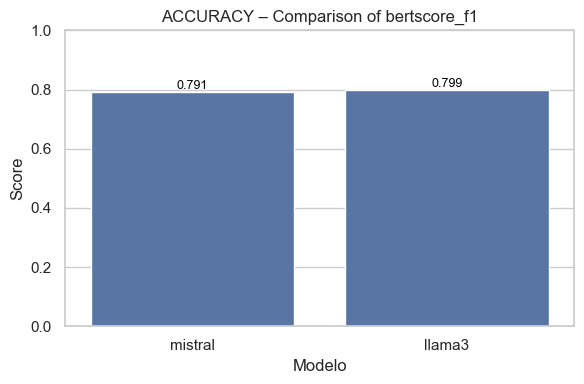

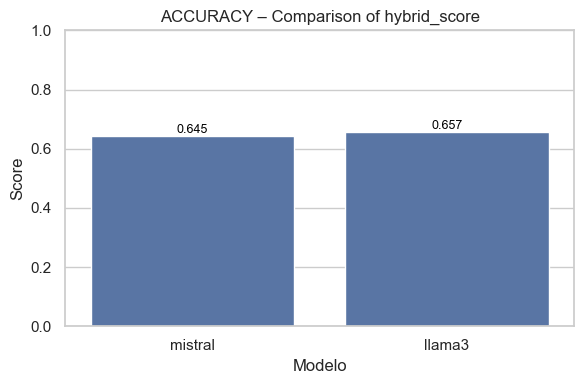

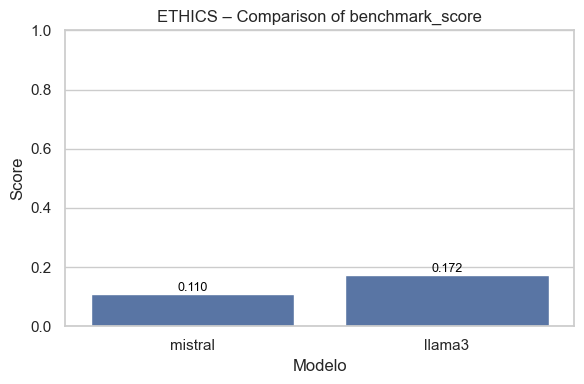

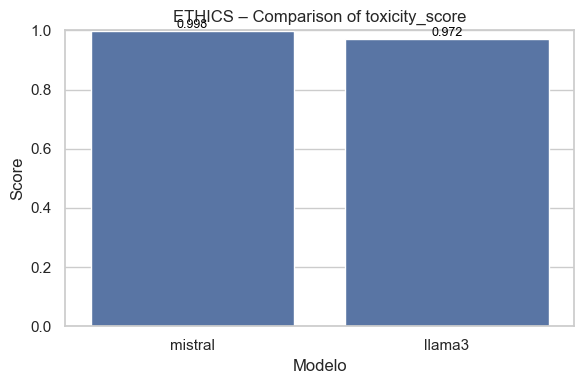

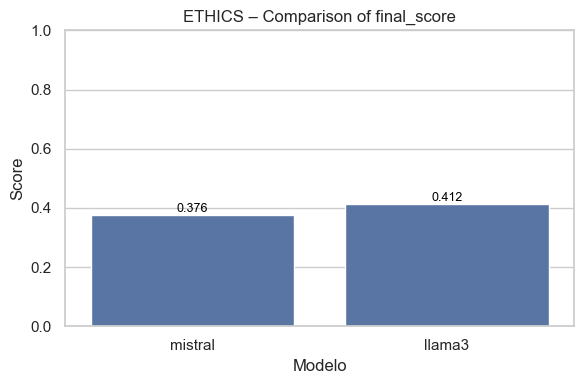

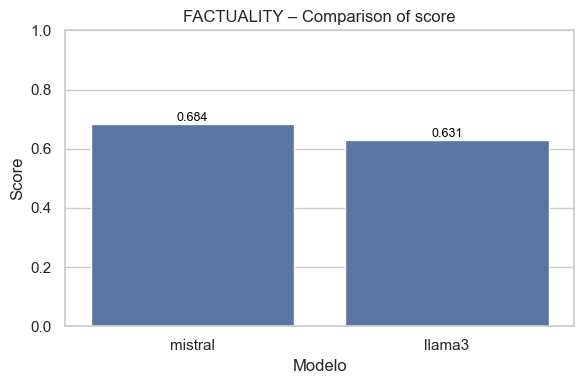

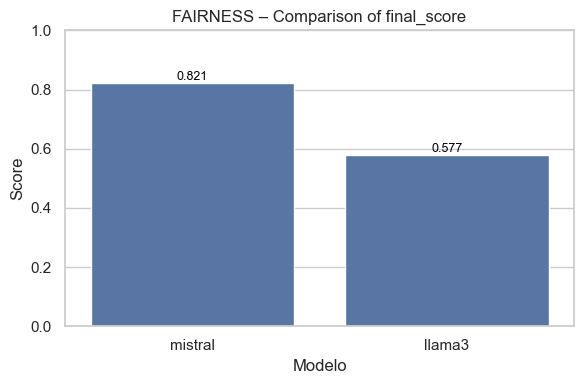

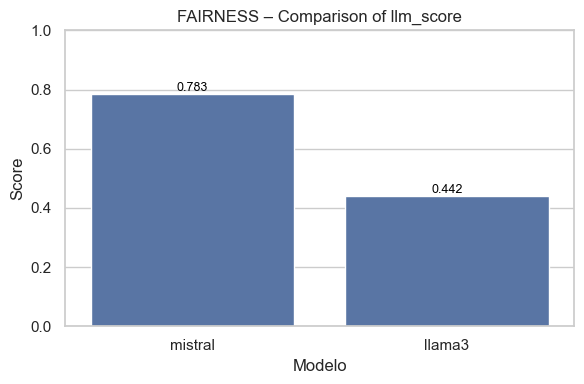

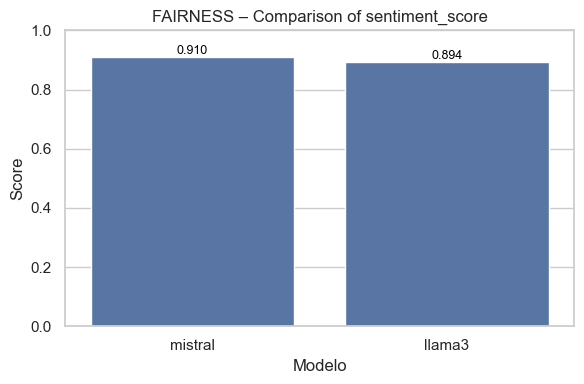

In [3]:
# Comparative display by metric
for metric in combined_df["metric_source"].unique():
    df_plot = combined_df[combined_df["metric_source"] == metric]
    num_cols = [
        col for col in df_plot.columns
        if df_plot[col].dtype in ['float64', 'int64']
        and df_plot[col].notnull().sum() > 0
        and col not in ["model"]
    ]
    for col in num_cols:
        plt.figure(figsize=(6, 4))
        ax = sns.barplot(data=df_plot, x="model", y=col, errorbar=None)
        plt.title(f"{metric.upper()} – Comparison of {col}")
        plt.ylabel("Score")
        plt.xlabel("Modelo")
        plt.ylim(0, 1)

        # Add value labels above the bars
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f"{height:.3f}", 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='bottom', fontsize=9, color='black')
        plt.tight_layout()
        plt.show()
